<a href="https://colab.research.google.com/github/TianaDumitrescu/emotion-recognition/blob/main/cnn_emotion_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import 

In [1]:
!ls data-set

angry


In [2]:
!ls data-set/angry

OAF_back_angry_default.jpg  OAF_beg_angry_default.jpg
OAF_bar_angry_default.jpg   OAF_bite_angry_default.jpg
OAF_base_angry_default.jpg  OAF_bone_angry_default.jpg
OAF_bath_angry_default.jpg  OAF_book_angry_default.jpg
OAF_bean_angry_default.jpg


In [9]:
import os

#walk through directory and list number of files
for dirpath, dirnames, filenames in os.walk("data-set"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'data-set'.
There are 0 directories and 10 images in 'data-set/angry'.
There are 0 directories and 10 images in 'data-set/disgust'.
There are 0 directories and 0 images in 'data-set/.ipynb_checkpoints'.


In [12]:
!ls -la data-set 

total 20
drwxr-xr-x 5 root root 4096 Feb 26 02:39 .
drwxr-xr-x 1 root root 4096 Feb 26 02:34 ..
drwxr-xr-x 2 root root 4096 Feb 26 02:43 angry
drwxr-xr-x 2 root root 4096 Feb 26 02:40 disgust
drwxr-xr-x 2 root root 4096 Feb 26 02:33 .ipynb_checkpoints


In [14]:
#Another way to find out how many images are in a file
num_angry_images_train = len(os.listdir("data-set/angry"))
num_angry_images_train

10

In [20]:
#To visualize our images, we can find class names programmatically

#Get the classnames rogrammatically
import pathlib
import numpy as np

data_dir = pathlib.Path("data_steak")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #created a list of class names from the subdirectory
class_names = class_names[1:]
print(class_names)

[]


['OAF_beg_disgust_default.jpg']
Image shape: (369, 496, 3)


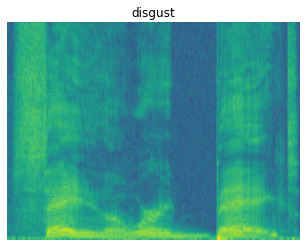

In [35]:
#Visualizing our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #Read in the image and plot it using matplotlib
  img = mpimg .imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  
  print(f"Image shape: {img.shape}") #show the shape of the image // we'll use this to turn into tensor later on

  return img

#View the random image from the training dataset
img = view_random_image(target_dir="data-set/",
                        target_class="disgust")

In [37]:
#Turn image into tensor
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(369, 496, 3), dtype=uint8, numpy=
array([[[ 52, 119, 146],
        [ 44, 109, 139],
        [ 52, 111, 145],
        ...,
        [ 46,  84, 129],
        [ 58,  94, 142],
        [ 32,  70, 117]],

       [[ 51, 118, 145],
        [ 46, 111, 141],
        [ 53, 113, 147],
        ...,
        [ 45,  86, 130],
        [ 59, 100, 146],
        [ 40,  81, 127]],

       [[ 47, 117, 143],
        [ 48, 115, 144],
        [ 55, 115, 149],
        ...,
        [ 43,  90, 132],
        [ 61, 105, 150],
        [ 49,  96, 140]],

       ...,

       [[ 50, 188, 110],
        [ 51, 188, 116],
        [ 51, 185, 126],
        ...,
        [ 51, 186, 120],
        [ 63, 189, 116],
        [ 60, 180, 106]],

       [[ 47, 189, 105],
        [ 49, 190, 112],
        [ 51, 187, 123],
        ...,
        [ 53, 189, 117],
        [ 63, 190, 111],
        [ 58, 180,  97]],

       [[ 57, 182, 126],
        [ 56, 185, 121],
        [ 53, 187, 116],
        ...,
        [ 56, 182, 12

In [38]:
#View the image shape
img.shape #returns width, height, color channels

(369, 496, 3)

In [40]:
#Normalization of Data (Creating a scalar by setting data as values between 0 and 1)

#Get all the pixel values between 0 and 1
img/255.

array([[[0.20392157, 0.46666667, 0.57254902],
        [0.17254902, 0.42745098, 0.54509804],
        [0.20392157, 0.43529412, 0.56862745],
        ...,
        [0.18039216, 0.32941176, 0.50588235],
        [0.22745098, 0.36862745, 0.55686275],
        [0.1254902 , 0.2745098 , 0.45882353]],

       [[0.2       , 0.4627451 , 0.56862745],
        [0.18039216, 0.43529412, 0.55294118],
        [0.20784314, 0.44313725, 0.57647059],
        ...,
        [0.17647059, 0.3372549 , 0.50980392],
        [0.23137255, 0.39215686, 0.57254902],
        [0.15686275, 0.31764706, 0.49803922]],

       [[0.18431373, 0.45882353, 0.56078431],
        [0.18823529, 0.45098039, 0.56470588],
        [0.21568627, 0.45098039, 0.58431373],
        ...,
        [0.16862745, 0.35294118, 0.51764706],
        [0.23921569, 0.41176471, 0.58823529],
        [0.19215686, 0.37647059, 0.54901961]],

       ...,

       [[0.19607843, 0.7372549 , 0.43137255],
        [0.2       , 0.7372549 , 0.45490196],
        [0.2       , 0

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:



*   Load our images
*   Preprocess our images
*   Build a CNN to find patterns in our images
*   Compile our CNN
*   Fit the CNN to our training data

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Set the seed
tf.random.set_seed(42)

#Preprocess data (get all of the pixel values between 0 and 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale = 1./255) 
valid_datagen = ImageDataGenerator(rescale = 1./255)

#Setup paths to our training directories
train_dir = "/content/data-set/angry"
test_dir = "/content/data-set/disgust"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size = 32,
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32, 
                                               target_size = (224, 224),
                                               class_mode = "binary",
                                               seed = 42)

#Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activaton = "sigmoid")
])

#Compile our CNN
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


TypeError: ignored

In [5]:
len(train_data)

NameError: ignored